# 猫狗大战
## 机器学习工程师 纳米学位 开题报告
陈睿嘉  
2018年1月7日


## 项目概述
　　猫狗大战源自Kaggle于2013年举办的一个娱乐竞赛项目，要求分辨给定测试图片是猫还是狗,属于图像分类问题，可以使用卷积神经网络（Convolutional Neural Network，CNN）构建深度模型解决。  
　　此外，项目可选输出猫狗面部坐标以及身体Mask，为图像目标检测（Object Localization and Detection）问题，可以在分类问题使用的模型卷积层基础上，使用RCNN（Region Convolutional Neural Network）、Fast RCNN、Faster RCNN、RFCN（Region-Based Fully Convolutional Networks）、SSD（Single Shot Multibox Dector）等模型解决。

### 领域背景
　　卷积神经网络是深度学习已经投入实际应用中且已经收获一定成功的先验网络结构之一，根据生物视觉神经中感受野（receptive field）概念的启发，使用卷积核取代传统DNN（Deep Neural Network）层与层之间的全连接权重，在极大降低了网络参数数量的基础上理论上相比全连接网络性能只是略微降低。由于计算机视觉相关问题数据结构的特殊性（图像、视频等），即往往每个像素只与附近区域的像素高度相关，非常适合使用CNN模型。  
　　使用卷积神经网络结构构建的较为著名的模型有VggNet、ResNet、Inception、Xception等，都可以在更大型图像分类问题（如ImageNet）上达到较高的准确率，相比较而言，猫狗大战作为二分类问题相对更简单，训练模型需要的数据量更小，更适合初学者理解和实现图像分类问题的解决方案。  
　　图像目标检测模型大多以RCNN原理为基础，针对效率进行改进。//待补充

### 问题陈述
　　猫狗大战本质上属于监督学习，假设样本数据服从伯努利分布，学习一个条件概率分布模型$p(y|x)$，输入图片像素值向量$x$，输出样本$x$表示狗的概率$\hat{y} = p(y=dog|x)$，那么样本表示猫的概率就为$1-\hat{y}$。  
　　然而，图像数据的特征不易提取，甚至不易理解，人类本身也无法准确描述分辨猫狗的核心特征。但若使用整个像素向量作为特征向量，以像素向量的高维度性，使用传统机器学习方法将带来维度灾难（Curse of dimensionality），即需求像素维度指数级别的均匀样本，并且模型参数数量也将增长至同样数量级，导致计算量急剧增加。  
　　输出猫狗脸部坐标及身体Mask属于目标检测问题，由于对大量数据标注坐标、轮廓等人工手段十分耗时，并且具有强烈的主观性与高误差性，并不能完全使用监督学习的方法解决此问题，因此，目标检测比图像分类问题更复杂。  

### 数据描述
　　训练数据集包括25000张图片，并在文件名中标注了图片为猫还是狗，猫狗数量各占一半，测试数据集包括12500张图片，没有标注类别，文件以数值ID命名。

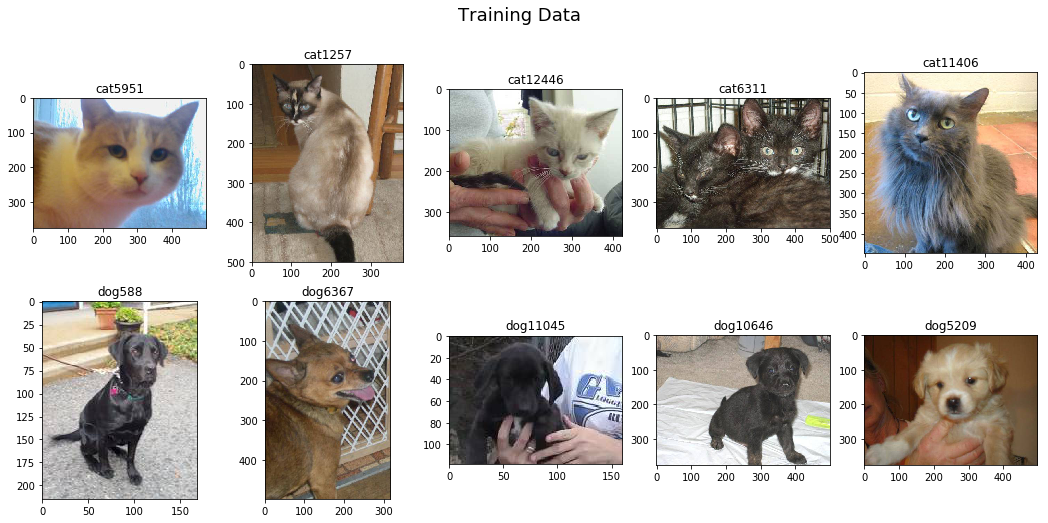

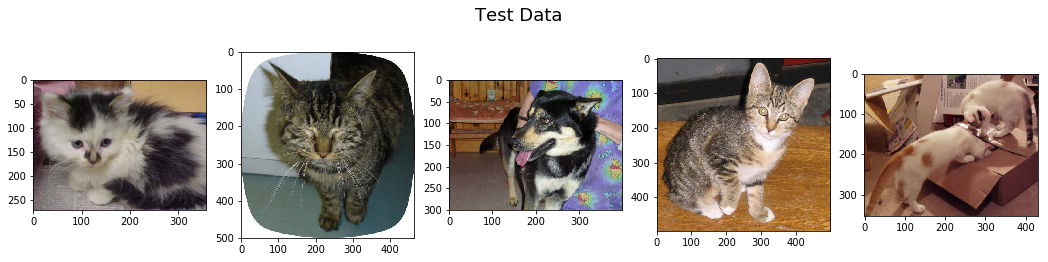

In [21]:
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def random_plot_data():
    # plot training data
    file_path = "dog_vs_cat_data\\train\\"
    cat_id_list = random.sample(range(12500), 5)
    dog_id_list = random.sample(range(12500), 5)
    cat_imgs = [cv2.imread(file_path + "cat.{}.jpg".format(i), 1) for i in cat_id_list]
    dog_imgs = [cv2.imread(file_path + "dog.{}.jpg".format(i), 1) for i in dog_id_list]

    plt.figure(figsize=(18, 8))
    plt.suptitle('Training Data', fontsize=18)
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.title('cat{}'.format(cat_id_list[i]))
        plt.imshow(cat_imgs[i][:, :, ::-1])
        plt.subplot(2, 5, i+6)
        plt.title('dog{}'.format(dog_id_list[i]))
        plt.imshow(dog_imgs[i][:, :, ::-1])

    plt.show()

    #plot test data
    file_path = "dog_vs_cat_data\\test1\\"
    test_id_list = random.sample(range(12500), 5)
    test_imgs = [cv2.imread(file_path + "{}.jpg".format(i+1), 1) for i in test_id_list]
    
    plt.figure(figsize=(18, 4))
    plt.suptitle('Test Data', fontsize=18)
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(test_imgs[i][:, :, ::-1])

    plt.show()

random_plot_data()

　　如上图随机选取图片所示，内容具备多样性与复杂性。如图片尺寸参差不齐，不同图片包括了猫/狗身体不同角度，有的图片没有包含全身，甚至没有正面脸部，图片背景元素也具备充分的干扰性。  


### 解决方案
　　针对维度灾难，深度网络的层次结构可以将模型容量（Capacity）增长为样本维度的指数级别，而没有增加太多的模型参数。又由于高维度的图像数据向量并不是每种组合都有意义，模型需要学习的模式通常为数据向量的某种低维流形表示，并不需要样本维度指数级别的数据量，所以使用深度网络模型满足解决此问题的理论基础。然而，对于图像数据，DNN模型引入的参数太多，随着网络规模增加，几乎无法训练，由此，根据像素值往往只与附近区域的像素高度相关这一先验特征，CNN模型成为了当前最适合进行图像分类的先验模型。  
　　RCNN使用监督学习的方法实现目标检测，

### 基准模型
　　目前图像分类问题的最大规模数据集为ImageNet，需要从超过100,0000张图片的训练数据中学习识别1000种图像分类（包括猫狗等动物），通常在此数据集上训练好的模型，对其他图像问题具有良好的泛化性能。ImageNet的分类评价指标一般为top-5 test error，即根据概率从大到小排名前5的分类结果中没有包括正确分类的百分比错误率。  
　　VggNet使用最深为19层的传统网络结构，在ImageNet中达到单网模型错误率7.0%，双网模型则达到6.8%；  
　　同期GoogLeNet即第一版Inception模型，增加网络宽度，减少了选择卷积核尺寸等参数的人为因素，直接将不同尺寸以及池化层放在同一层并将输出拼接，然后为了降低计算参数，使用$1\times1$卷积核进行降维，单网错误率为7.9%，多网模型则达到6.7%；  
　　ResNet则着重解决网络深度增加反而造成欠拟合的问题，以解决输入到输出的直接映射为中心思想，将输出函数改为源目标函数$H(x)$与输入的残差（Residual）$F(x)$，再将输入层无参数连接（或维度映射）到输出层，使最终输出保持为$H(x)=F(x)+x$，使网络能够达到极高的深度而不增加太多参数，如ResNet50与ResNet152分别达到6.7%与5.7%的错误率，多网模型甚至达到3.7%的错误率；    
　　Inception v3在GoogLeNet的基础上，将大型卷积核分解为多个小型甚至一维卷积核，并加上非线性激活单元，在降低参数数量的基础上提高了模型表现，多模型最好表现达到3.58%的错误率；  
　　Inception v4将Inception block结构改进的更加复杂，使单网络模型错误率达到3.8%，同时提出结合ResNet原理的Inception-ResNet v2，达到3.7%的错误率并且训练更快；  
　　Xception以图像空间信息与channel信息分开处理为思想，使用depthwise separable convolution方法对每个channel分开卷积，然后使用传统$1\times1$卷积核进行合并，此结构进一步降低参数数量，理论上能提高模型性能，虽然在ImageNet上单网模型性能没能超过Incetion，但在别的数据集上测试结果更优，作者将此归为Inception对ImageNet存在过拟合；  
　　ResNeXt也结合ResNet和Inception的思想，但提出Inception的block内部结构太过多样性而需要人为设计，设计一种内部子结构一样的block，在复杂度降低一半的情况下达到比Res200更好的表现。  
　　//RCNN

### 评价指标
　　模型输出单元使用Sigmoid激活函数，损失函数采用对数损失函数，即伯努利分布下的交叉熵：  
$$L(y, \hat{y})=-ylog(\hat{y})-(1-y)log(1-\hat{y})$$
$$Cost=\frac{1}{m}\sum_{i=1}^{m}L(y_{i}, \hat{y}_{i})$$
　　损失函数的形式可以通过对模型输出$\hat{y} = p(y=dog|x)$取极大似然估计导出，并且其对数形式可以解决Sigmoid输出单元两端饱和导致梯度消失的缺陷。  
　　目前优秀的模型已经在ImageNet这一更难的问题上达到约3%的错误率，那么作为更简单的二分类问题，不仅要求对测试集正确分类，还需要对正确分类结果具有很高的概率输出。所以，Kaggle对于测试结果的评价指标使用对数损失函数，需要大概低于0.1的结果才能获得较高的排名。

### 项目设计
　　项目使用以Tensorflow为框架封装的Keras API进行模型实现。在项目实现过程中，可以先从几个必须的步骤开始，快速训练一个简单模型，然后通过分析测试结果和学习曲线，逐渐改进方法与模型，如通过增加模型容量改善欠拟合，数据增强（Data Augmentation）等方法应对过拟合，其详细步骤如下：  
数据预处理：  
　　剔除异常样本，异常值判定标注可以考虑图片尺寸、像素值等，甚至可以使用训练好的CNN模型输出图像特征向量，根据向量欧氏距离判定，异常样本删除需慎重，若判断出的样本数量不多，可以对样本图片进行主观判断是否保留；  
　　图像尺寸统一，一般统一为所使用模型需要的输入尺寸；  
　　像素值正则化（Normalization）， 一般将像素值映射到$[0,1]$的闭区间，部分模型需求的闭区间不同；  
　　数据增强，方法包括如翻转、平移、旋转、缩放、错切（Shear）、高光、低光等方式处理训练样本，必要时进行插值处理。数据增强可以增加样本数量，一般有益于减少过拟合，提高模型泛化能力，Keras的ImageDataGenerator接口已经封装了大部分所需要用到的方法。  

模型选择：  
　　由于硬件与时间条件限制，最终一定会采用迁移学习方法。在ImageNet数据集中训练且表现优秀的模型，对其他图像分类问题也具有良好的泛化性能，其卷积层已经学习到常见图像数据中的关键特征。一般做法是通过已有模型的卷积层输出训练数据的特征向量，连接到少量全连接层以及输出层结构，相当于使用该模型识别到的关键特征向量进行浅层神经网络训练。若需要进一步改进结果，可以对网络后几个卷积层参数进行微调（Fine-tune），一般不需要对整个网络参数进行调整，因为适用于ImageNet问题的网络应对猫狗问题时，其模型容量本身就存在严重过拟合，过度修改参数可能破坏其学习到的具备较强泛化能力的关键特征。可选则模型包括VggNet、ResNet、Inception、Xception等，也可以选用多个模型，将输出向量拼接为一个向量。  

学习算法：    
　　根据以上模型、以及评价指标中定义的对数损失函数作为策略，可以使用随机梯度下降（Stochastic Gradient Dencent）或Adam、自适应学习率方法作为学习算法，但是对卷积层进行微调时，最好以较低学习率并使用SGD，以免造成过拟合，最终根据观察学习曲线，可以决定是否结合Momentum解决局部最优问题，以及结合权重衰减（Weight Decay）、Dropout等减少过拟合。  

目标检测：  
　　待补充。

